In [1]:
from fastai.vision import *
import os
import pandas as pd

In [3]:
import fastai
print(fastai.__version__)

1.0.61


In [4]:
ImageList.from_folder()

ImageList (28915 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: .

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
alist = os.listdir('./Large_Captcha_Dataset')

for i in range(len(alist)):
    alist[i]=[alist[i]]
    for j in range(5):
        alist[i].append(alist[i][0][j])
        
df=pd.DataFrame(alist)

In [6]:
df.head()

,0,1,2,3,4,5
0,1N672.png,1,N,6,7,2
1,W7TO4.png,W,7,T,O,4
2,4nyDu.png,4,n,y,D,u
3,Tc0wF.png,T,c,0,w,F
4,3p9D6.png,3,p,9,D,6


In [7]:
alist[:5]

[['1N672.png', '1', 'N', '6', '7', '2'],
 ['W7TO4.png', 'W', '7', 'T', 'O', '4'],
 ['4nyDu.png', '4', 'n', 'y', 'D', 'u'],
 ['Tc0wF.png', 'T', 'c', '0', 'w', 'F'],
 ['3p9D6.png', '3', 'p', '9', 'D', '6']]

In [8]:
path = './Large_Captcha_Dataset'

In [19]:
def label_from_filename(path):
    label = [char for char in path.name[:-4]]
    return label

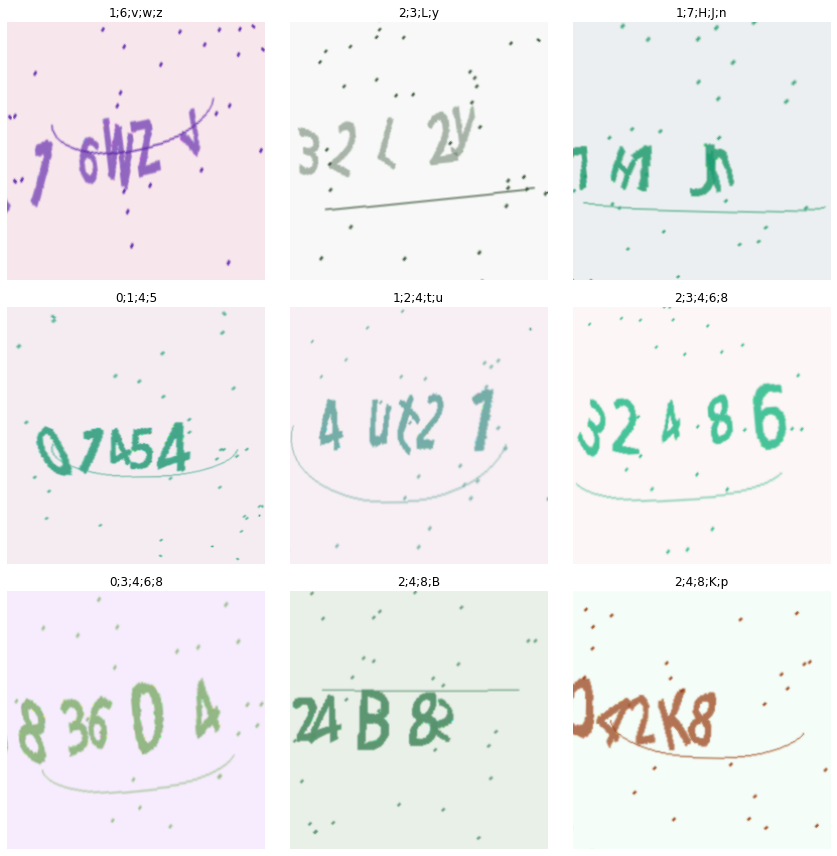

In [20]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_func(label_from_filename)
        .transform(get_transforms(do_flip=False))
        .databunch()
        .normalize()
       )
data.show_batch(3)

In [21]:
acc_02 = partial(accuracy_thresh, thresh=0.2)

epoch,train_loss,valid_loss,accuracy_thresh,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


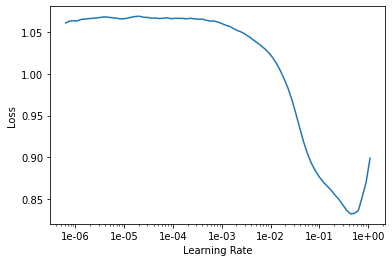

In [22]:
learn = learn = cnn_learner(data, models.resnet18, model_dir='/tmp', metrics=acc_02)
lr_find(learn)
learn.recorder.plot()

In [23]:
lr = 5e-2
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.190581,0.190689,0.921308,00:37
1,0.182011,0.224851,0.897650,00:38
2,0.159243,0.147308,0.932675,00:39
3,0.133968,0.111875,0.948726,00:40
4,0.119885,0.101208,0.953543,00:40


In [24]:
import copy

losses = copy.deepcopy(learn.recorder.losses)

epoch,train_loss,valid_loss,accuracy_thresh,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


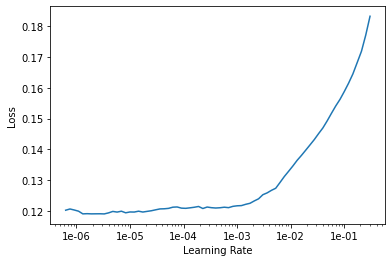

In [26]:
learn.unfreeze()
lr_find(learn)
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(15, slice(1e-3, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.093520,0.084331,0.960684,00:50
1,0.074066,0.101673,0.959566,00:52


KeyboardInterrupt: 

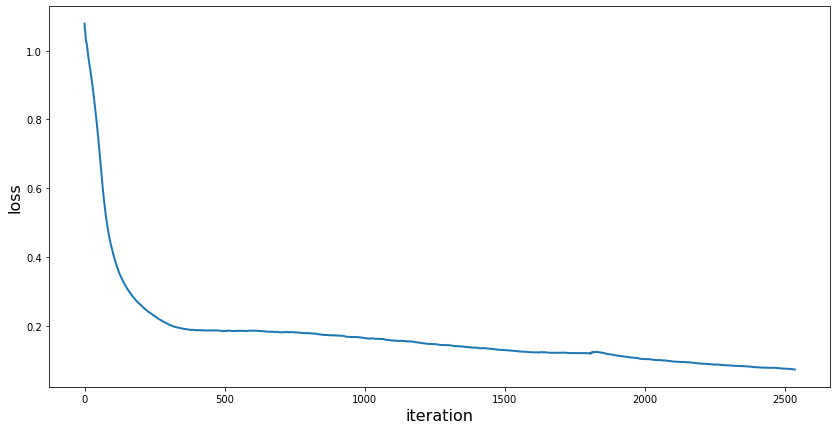

In [28]:
losses += learn.recorder.losses

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(losses, linewidth=2)
ax.set_ylabel('loss', fontsize=16)
ax.set_xlabel('iteration', fontsize=16)
plt.show()